# IT8302 CA1 - Part A - Classification

This notebook was created to fulil the requirements of the **IT8302 CA1** submission for the Singapore Polytechnic *Specialist Diploma in Data Science (Artificial Intelligence)*

## Background

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Dataset

You are to use the dataset. https://www.kaggle.com/c/titanic/data 

### Data Dictionary


| Variable | Definition                                 | Key                                            |
|---------:|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 - No, 1 - Yes                                |
| pclass   | Ticket class                               | 1 - 1st, 2 - 2nd, 3 - 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket Number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of embarkation                        | C - Cherbourg, Q - Queenstown, S - Southampton |

### Variable Notes

`pclass` - A proxy for socio-economic status (SES)

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

`age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp` - The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

`parch` - The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


## Tasks

1.	Write the code to solve the prediction task. Normally you would be using scikit-learn, but if you'd prefer to work with your own implementation of learning algorithms, or some other toolkit, that is fine.
2.	Use the Kaggle test set and submit to Kaggle site to obtain the test score. Screen shot the test score and submit with the Jupyter notebook used and the submission.csv file.
Use the URL: https://www.kaggle.com/c/titanic/submit 
3.	Write a report detailing your implementation, your experiments and analysis in the Jupyter notebook (along with your python code and comments). In particular, we'd like to know:

 - How is your prediction task defined? And what is the meaning of the output variable?
 - How do you represent your data as features?
 - Did you process the features in any way?
 - Did you bring in any additional sources of data?
 - How did you select which learning algorithms to use?
 - Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
 - How do you evaluate the quality of your system?
 - How well does your system compare to a stupid baseline?
 - Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix.
 - Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)

4.	Create a set of slides with the highlights of your Jupyter notebook report. Explain the entire machine learning process you went through, data exploration, data cleaning, feature engineering, and model building and evaluation. Write your conclusions.

----

# Preamble

We will follow the Machine Learning workflow set forth in Lecture 1

![title](Machine_Learning_Workflow.jpg)


In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import platform
%matplotlib inline

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

import warnings
warnings.filterwarnings('ignore')

************************
        Versions        
************************
Scikit-learn version=0.21.3
Numpy version=1.17.4
Pandas version=0.25.3
Matplotlib version=3.1.2
Python version=3.7.4


### Basic plot theming
For aesthetic purposes. Preview from one of the following:

`Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r`

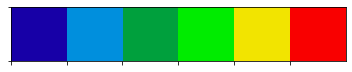

In [2]:
palette = 'nipy_spectral'
current_palette = sns.color_palette(palette)
sns.palplot(current_palette)

Once chosen, execute the following code to set the palette

In [3]:
sns.set_palette(current_palette)

Choose a style as well!

In [4]:
sns.set_style('darkgrid')

Set `rcParams`

In [5]:
matplotlib.rcParams['font.sans-serif']='Helvetica'
matplotlib.rcParams['font.size']='6.0'
matplotlib.rcParams['figure.figsize']='10, 5'
matplotlib.rcParams['figure.dpi']='150'


## Step 1 - Get Data
We will use `pandas` to assist with data loading, and then take a quick look at the underlying data.

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Cribb, Miss. Laura Alice",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [12]:
for i in ['Pclass','Sex','SibSp','Parch','Embarked']:
    print(train[['Survived',i]].groupby(i).mean())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
        Survived
Sex             
female  0.742038
male    0.188908
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


### Data Visualization

Now let's do some simple data visualizations about survival rates with `matplotlib` and `seaborn`

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


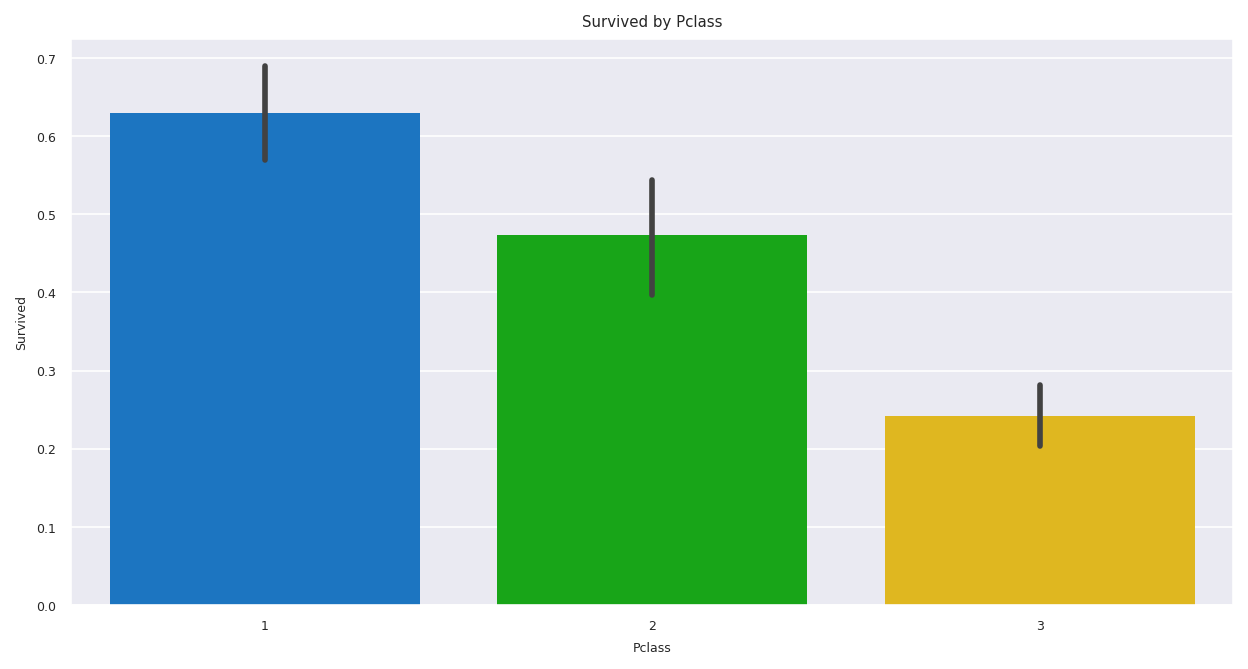

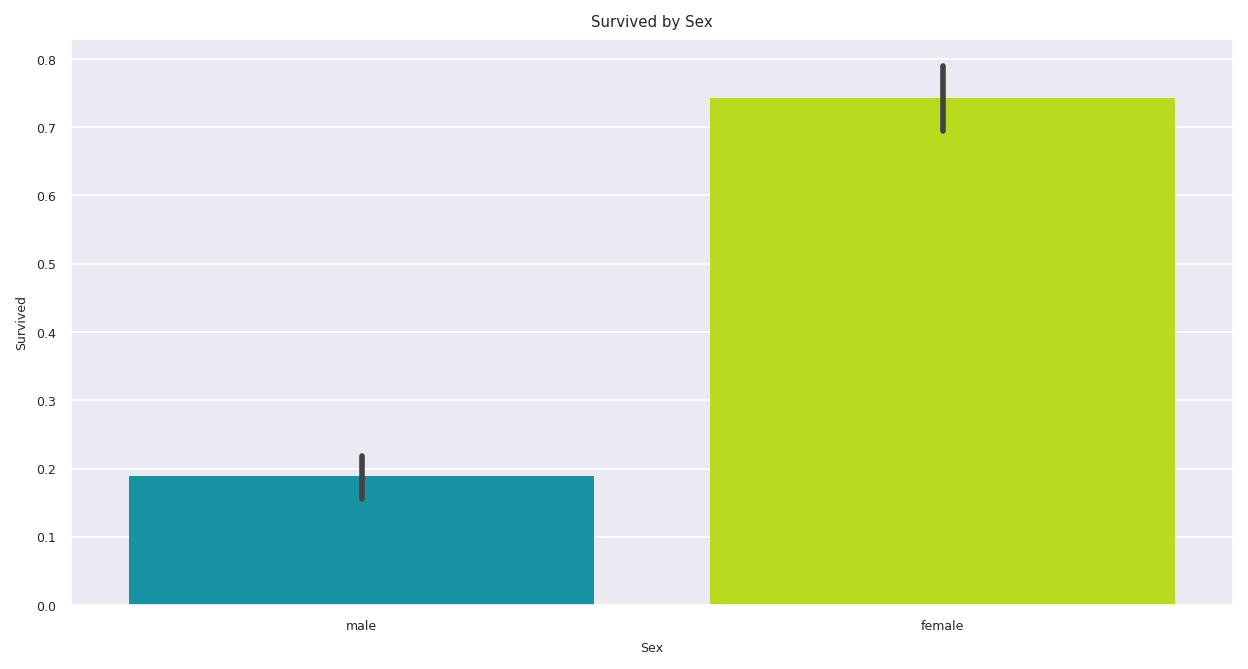

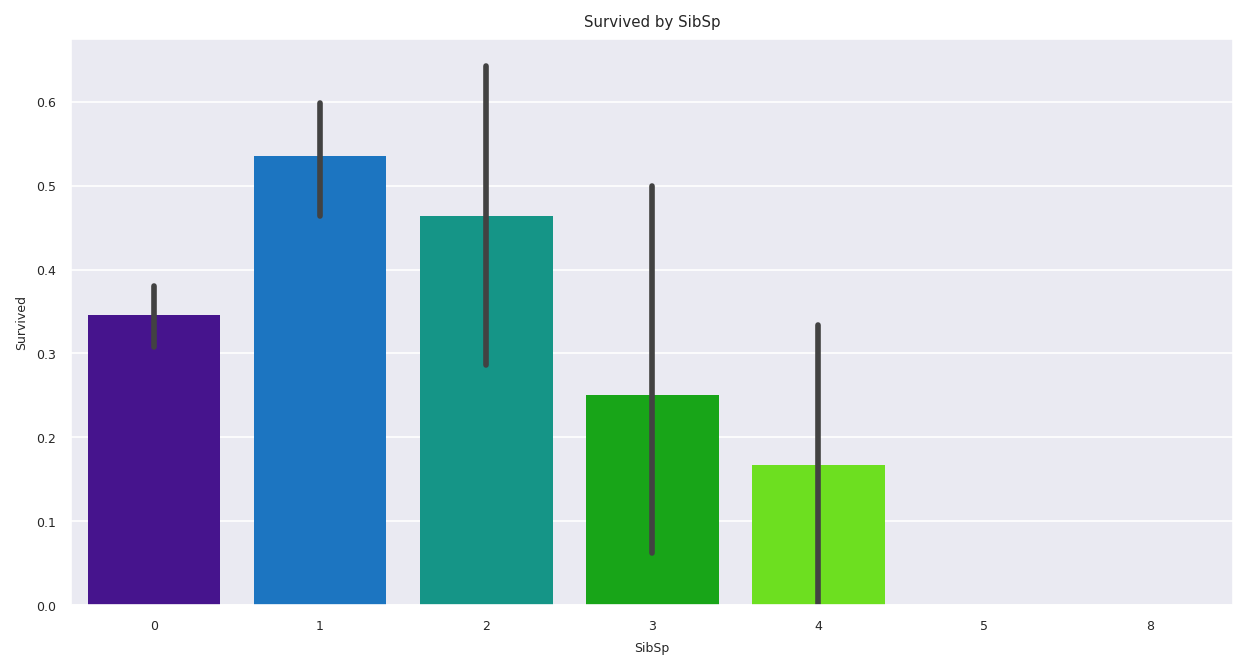

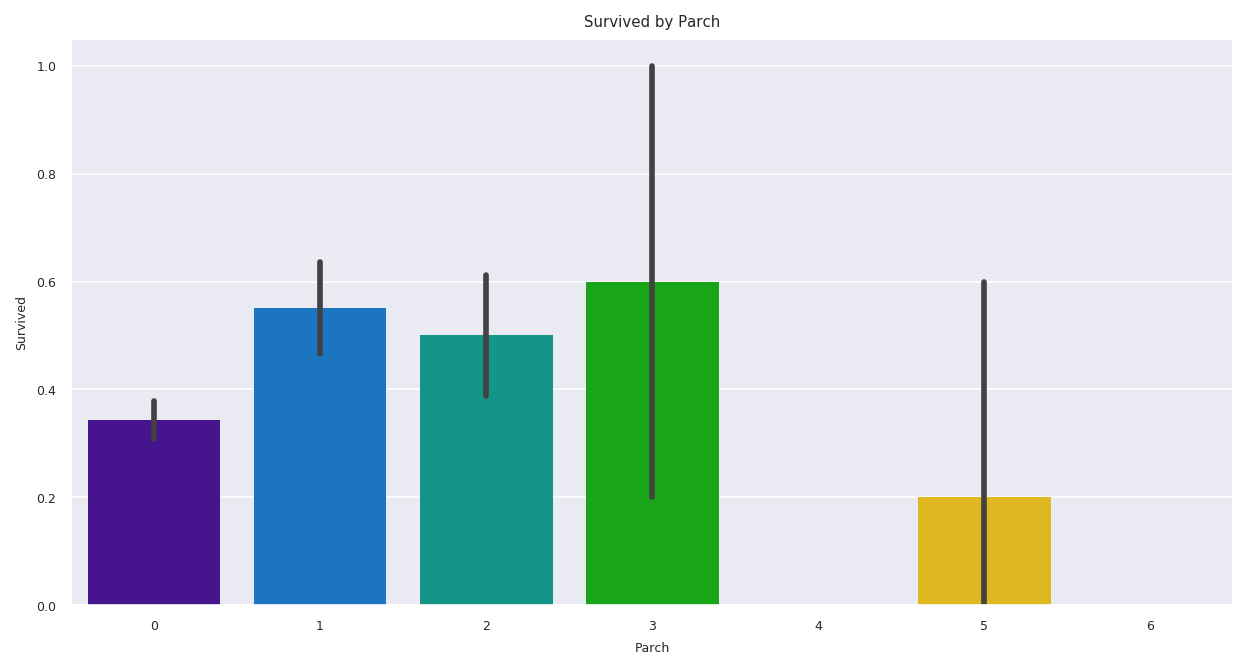

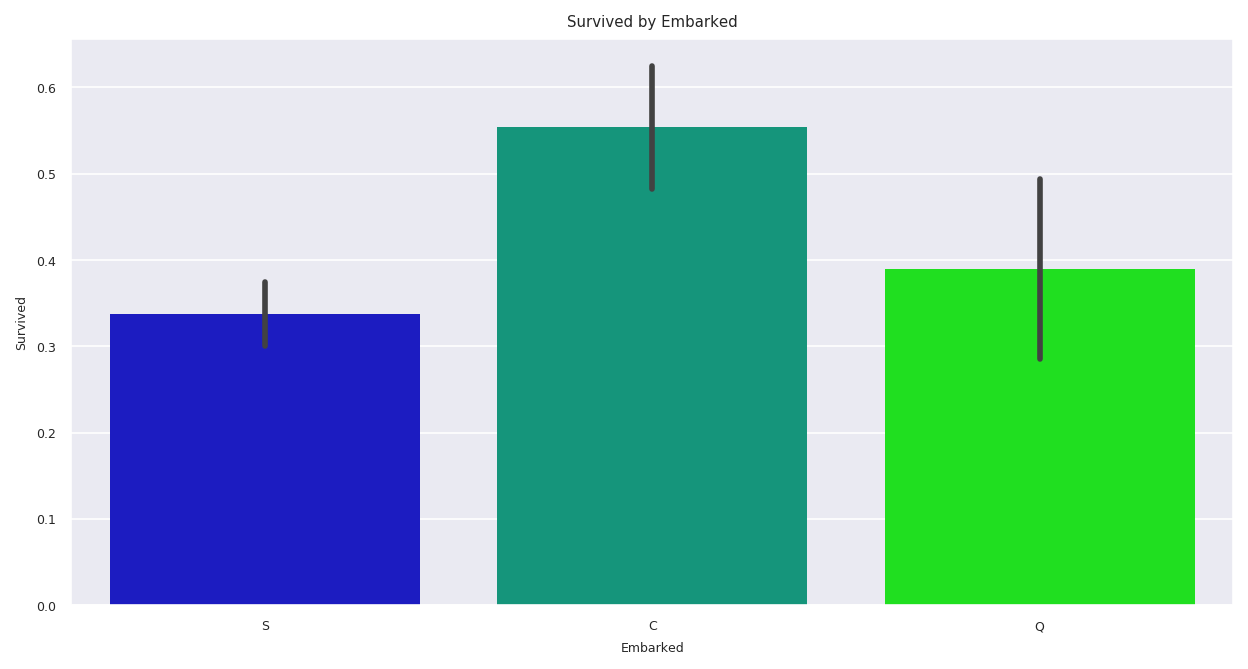

In [13]:
for i in ['Pclass','Sex','SibSp','Parch','Embarked']:
    plt.figure()
    sns.barplot(data=train[['Survived',i]].groupby(i).mean(),
                y=train['Survived'],
                x=train[i],
                edgecolor='None',
                palette=sns.color_palette(palette,len(pd.unique(train[i]))))
    plt.title('Survived by {}'.format(i))

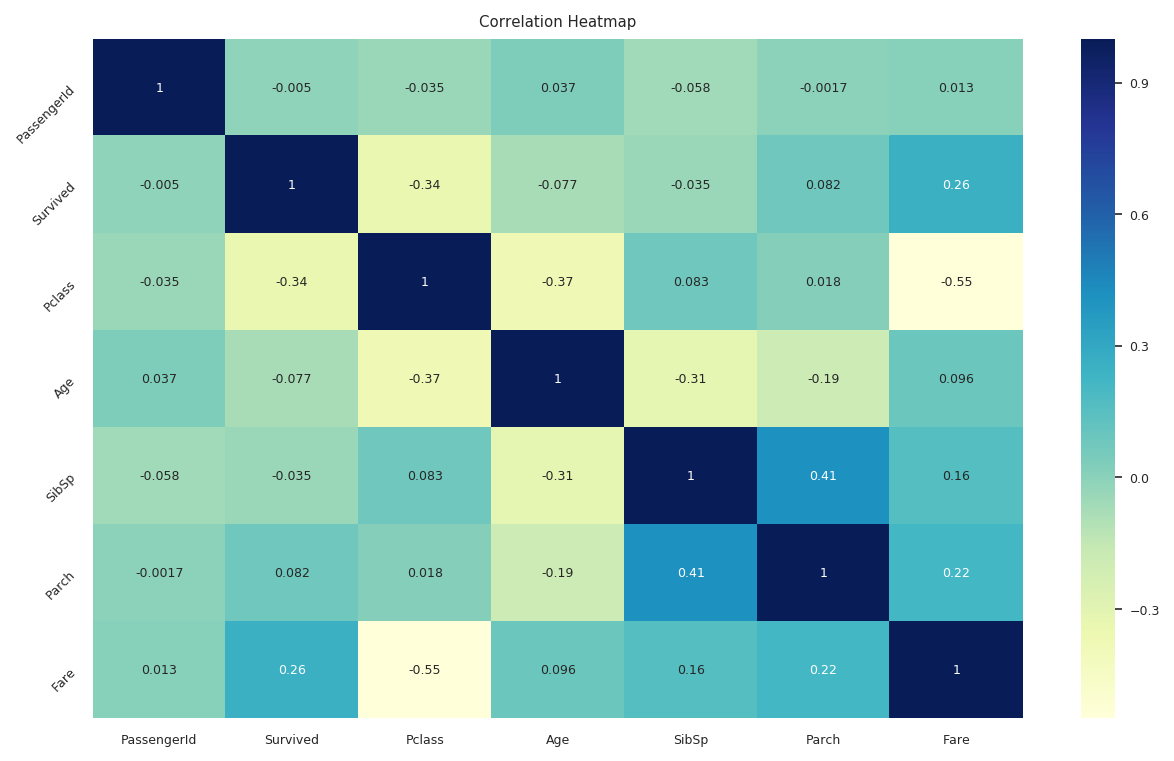

In [14]:
corr = train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="YlGnBu",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.title('Correlation Heatmap')
plt.yticks(rotation=45)
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.show()

From the preliminary analysis, it would seem that `Pclass`, `Sex` and `Cabin` have a significant bearing on the change of survivability.

They report `-0.34`, `0.54` and `0.32` correlation, respectively.

----

## Step 2 - Clean, Prepare & Manipulate Data

We put both `train` and `test` data into a list to ensure consistent data cleaning across both sets.

We will also encode the data into numerical values as the classifiers require numerical data.

In [15]:
combine = [train, test]

### Feature - `name`
We drop `name` since it is unlikely to yield any interesting information

In [16]:
for dataset in combine:
    dataset.drop(labels='Name',
                 axis=1,
                 inplace=True)

In [17]:
for dataset in combine:
    print(dataset.head(5))

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
   PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    m

### Feature - `Sex`

We need to encode `Sex` into numerical data

In [18]:
sex_mapping = {"male": 0, 
               "female": 1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    print(dataset.head(5))

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin Embarked  
0   7.2500   NaN        S  
1  71.2833   C85        C  
2   7.9250   NaN        S  
3  53.1000  C123        S  
4   8.0500   NaN        S  
   PassengerId  Pclass  Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    0  34.5      0      0   330911   7.8292   NaN   
1          893       3    1  47.0      1      0   363272   7.0000   NaN   
2          894       2    0  62.0      0      0   240276   9.6875   NaN   
3          895       3    0  27.0      0      0   315154 

### Feature - `Age`

The feature is already in numerical form. However, there are many `NaN` values present.

First, we fill in `NaN` with a sentinel value, `-0.5`

We then define a list representing the bins we will classify each passenger's into, and use `pd.cut` to assign a bin to each passenger. The `NaN` values are thus classified as 'Unknown'

In [19]:
age_bins = [-1,0,5,12,18,24,35,60,np.inf]
age_labels = ['Unknown',
              'Baby', 
              'Child', 
              'Teenager', 
              'Student', 
              'Young Adult', 
              'Adult', 
              'Senior']

for dataset in combine:
    dataset["Age"] = dataset["Age"].fillna(-0.5)
    dataset['AgeGroup'] = pd.cut(dataset["Age"], age_bins, labels = age_labels)

Since this is an ordinal category, we map each category to an integer, with 0 equating to 'Unknown' values

In [20]:
age_mapping = {'Unknown':0,
               'Baby': 1, 
               'Child': 2, 
               'Teenager': 3, 
               'Student': 4, 
               'Young Adult': 5, 
               'Adult': 6, 
               'Senior': 7}
for dataset in combine:
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_mapping)
    
for dataset in combine:
    dataset = dataset.drop(labels='Age',
                           axis=1,
                           inplace=True)

### Feature - `SibSp`

There are no missing values and the feature is already numeric in nature. Hence, no further processing is required.


### Feature - `Parch`

Similar to `SibSp`, there are no missing values and the feature is already numeric in nature. Hence, no further processing is required.


### Feature - Ticket

We can drop `Ticket` since it does not appear to have useful data

In [21]:
for dataset in combine:
    dataset.drop(labels='Ticket',
                 axis=1,
                 inplace=True)
    print(dataset.head(5))

   PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Cabin Embarked  \
0            1         0       3    0      1      0   7.2500   NaN        S   
1            2         1       1    1      1      0  71.2833   C85        C   
2            3         1       3    1      0      0   7.9250   NaN        S   
3            4         1       1    1      1      0  53.1000  C123        S   
4            5         0       3    0      0      0   8.0500   NaN        S   

  AgeGroup  
0        4  
1        6  
2        5  
3        5  
4        5  
   PassengerId  Pclass  Sex  SibSp  Parch     Fare Cabin Embarked AgeGroup
0          892       3    0      0      0   7.8292   NaN        Q        5
1          893       3    1      1      0   7.0000   NaN        S        6
2          894       2    0      0      0   9.6875   NaN        Q        7
3          895       3    0      0      0   8.6625   NaN        S        5
4          896       3    1      1      1  12.2875   NaN        S       

### Feature - Fare

Since `Fare` is already numerical type data, no encoding is required. There are some `NaN` instances in the test dataset, so we use `fillna` method on each `DataFrame` to fill `Nan` with the mean Fare for each `Pclass`.

In [22]:
for dataset in combine:
    dataset["Fare"] = dataset.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))
    print(dataset.head())

   PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Cabin Embarked  \
0            1         0       3    0      1      0   7.2500   NaN        S   
1            2         1       1    1      1      0  71.2833   C85        C   
2            3         1       3    1      0      0   7.9250   NaN        S   
3            4         1       1    1      1      0  53.1000  C123        S   
4            5         0       3    0      0      0   8.0500   NaN        S   

  AgeGroup  
0        4  
1        6  
2        5  
3        5  
4        5  
   PassengerId  Pclass  Sex  SibSp  Parch     Fare Cabin Embarked AgeGroup
0          892       3    0      0      0   7.8292   NaN        Q        5
1          893       3    1      1      0   7.0000   NaN        S        6
2          894       2    0      0      0   9.6875   NaN        Q        7
3          895       3    0      0      0   8.6625   NaN        S        5
4          896       3    1      1      1  12.2875   NaN        S       

In [23]:
for dataset in combine:
    dataset['FareBand'] = pd.qcut(dataset['Fare'],
                                  4,
                                  labels=[1,2,3,4])
    dataset=dataset.drop(['Fare'],
                         axis=1,
                         inplace=True)
    print(dataset)

None
None


### Feature - Cabin

We encode Cabin such that `NaN` will be equal to zero, and non null values will equal 1

In [24]:
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].apply(lambda x: 1 if not pd.isnull(x) else 0)
    print(dataset.head(5))

   PassengerId  Survived  Pclass  Sex  SibSp  Parch  Cabin Embarked AgeGroup  \
0            1         0       3    0      1      0      0        S        4   
1            2         1       1    1      1      0      1        C        6   
2            3         1       3    1      0      0      0        S        5   
3            4         1       1    1      1      0      1        S        5   
4            5         0       3    0      0      0      0        S        5   

  FareBand  
0        1  
1        4  
2        2  
3        4  
4        2  
   PassengerId  Pclass  Sex  SibSp  Parch  Cabin Embarked AgeGroup FareBand
0          892       3    0      0      0      0        Q        5        1
1          893       3    1      1      0      0        S        6        1
2          894       2    0      0      0      0        Q        7        2
3          895       3    0      0      0      0        S        5        2
4          896       3    1      1      1      0        S    

### Feature - Embarked

First, there are two `NaN` values in `Embarked`. Since it is clear most of the people embarked from Southampton, we shall fill the `NaN` with S.

In [25]:
train['Embarked'].fillna(value='S',inplace=True)
train.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,0.523008,0.381594,0.228956
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,0.420397
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


We also need to map each value in `Embarked` to a number.

In [26]:
embarked_mapping = {"S": 1, 
                    "C": 2, 
                    "Q": 3}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    print(dataset.head(5))

   PassengerId  Survived  Pclass  Sex  SibSp  Parch  Cabin  Embarked AgeGroup  \
0            1         0       3    0      1      0      0         1        4   
1            2         1       1    1      1      0      1         2        6   
2            3         1       3    1      0      0      0         1        5   
3            4         1       1    1      1      0      1         1        5   
4            5         0       3    0      0      0      0         1        5   

  FareBand  
0        1  
1        4  
2        2  
3        4  
4        2  
   PassengerId  Pclass  Sex  SibSp  Parch  Cabin  Embarked AgeGroup FareBand
0          892       3    0      0      0      0         3        5        1
1          893       3    1      1      0      0         1        6        1
2          894       2    0      0      0      0         3        7        2
3          895       3    0      0      0      0         1        5        2
4          896       3    1      1      1      0  

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,AgeGroup,FareBand
0,1,0,3,0,1,0,0,1,4,1
1,2,1,1,1,1,0,1,2,6,4
2,3,1,3,1,0,0,0,1,5,2
3,4,1,1,1,1,0,1,1,5,4
4,5,0,3,0,0,0,0,1,5,2


----

## Step 3 - Train Model

Now that we have cleaned and prepped the data for modelling, its time to train the model.

Let's get the X and y variables from the `train` and `test` sets.

In [28]:
from sklearn.model_selection import train_test_split
predictors = train.drop(['Survived','PassengerId'],axis=1)
target = train['Survived']
X_train, X_val, Y_train, Y_val = train_test_split(predictors, target, test_size = 0.2)

### Model Choices

We will now fit the data using the following models

1. Gaussian Naive Bayes
2. Logistic Regression
3. Support Vector Machines
4. Linear SVC
5. Perceptron
6. Decision Tree
7. Random Forest
8. K Nearest Neighbours
9. Stochastic Gradient Descent
10. Gradient Boosting Classifier

Let's start by importing the relevant classifiers

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model_list = {'gaussian':GaussianNB(),
              'logreg':LogisticRegression(),
              'svc':SVC(),
              'linear_svc':LinearSVC(),
              'perceptron':Perceptron(),
              'decisiontree':DecisionTreeClassifier(),
              'randomforest':RandomForestClassifier(),
              'knn':KNeighborsClassifier(),
              'sgd':SGDClassifier(),
              'gbk':GradientBoostingClassifier()}

In [30]:
accuracy_scores = {'model':[], # Initialize empty dict to record results
                   'classifier':[],
                   'accuracy':[],
                   'Y_pred':[]}

for model, classifier in model_list.items():
    classifier.fit(X_train, Y_train)          # 2. Fit model to data
    Y_pred = classifier.predict(X_val)
    acc_model = round(accuracy_score(Y_pred, Y_val)*100,2)
    print('The accuracy for [{}] classifier is [{}]'.format(model,acc_model))
    accuracy_scores['model'].append(model)
    accuracy_scores['classifier'].append(classifier)
    accuracy_scores['accuracy'].append(acc_model)
    accuracy_scores['Y_pred'].append(Y_pred)

accuracy_scores = pd.DataFrame(accuracy_scores).sort_values(by='accuracy').set_index('model')
accuracy_scores

The accuracy for [gaussian] classifier is [75.98]
The accuracy for [logreg] classifier is [79.89]
The accuracy for [svc] classifier is [84.92]
The accuracy for [linear_svc] classifier is [81.01]
The accuracy for [perceptron] classifier is [83.24]
The accuracy for [decisiontree] classifier is [81.56]
The accuracy for [randomforest] classifier is [83.24]
The accuracy for [knn] classifier is [82.68]
The accuracy for [sgd] classifier is [79.89]
The accuracy for [gbk] classifier is [83.8]


,classifier,accuracy,Y_pred
model,,,
gaussian,"GaussianNB(priors=None, var_smoothing=1e-09)",75.98,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, ..."
logreg,"LogisticRegression(C=1.0, class_weight=None, d...",79.89,"[1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, ..."
sgd,"SGDClassifier(alpha=0.0001, average=False, cla...",79.89,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, ..."
linear_svc,"LinearSVC(C=1.0, class_weight=None, dual=True,...",81.01,"[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, ..."
decisiontree,"DecisionTreeClassifier(class_weight=None, crit...",81.56,"[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, ..."
knn,"KNeighborsClassifier(algorithm='auto', leaf_si...",82.68,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, ..."
perceptron,"Perceptron(alpha=0.0001, class_weight=None, ea...",83.24,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, ..."
randomforest,"(DecisionTreeClassifier(class_weight=None, cri...",83.24,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, ..."
gbk,([DecisionTreeRegressor(criterion='friedman_ms...,83.80,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, ..."


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

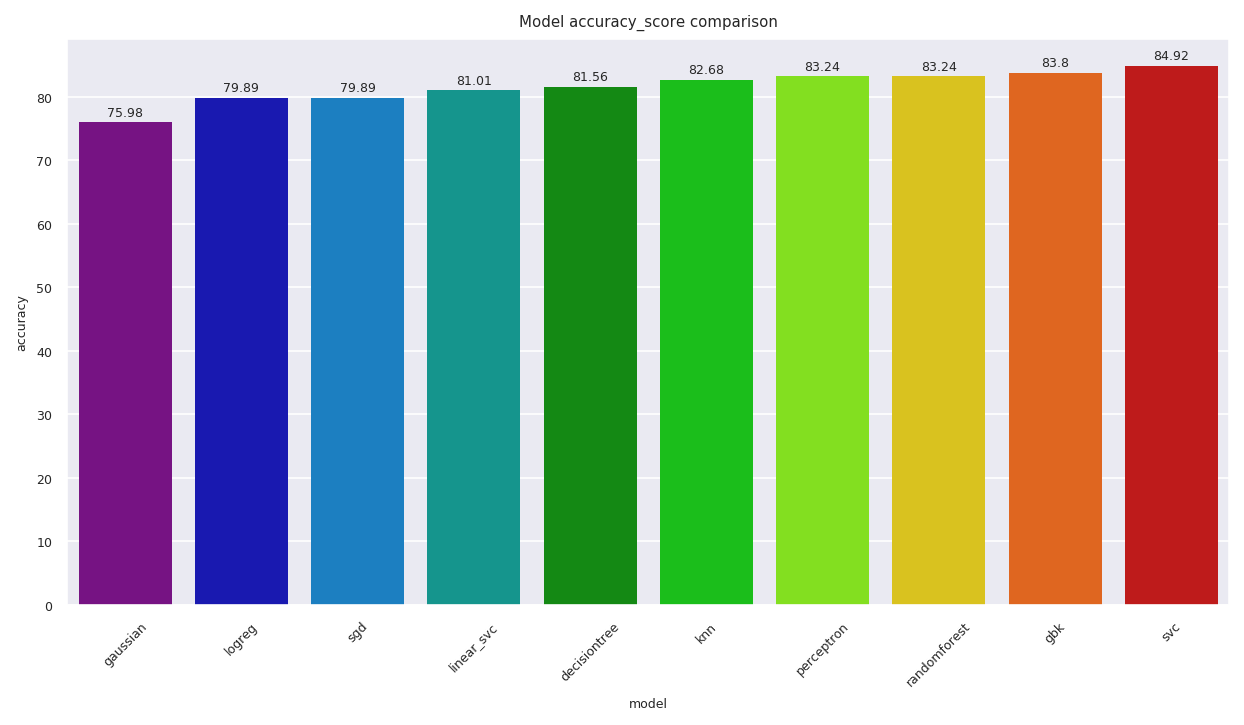

In [31]:
fig, ax = plt.subplots()
sns.barplot(x=accuracy_scores.index,
            y=accuracy_scores['accuracy'],
            palette=sns.color_palette(palette,10),
            edgecolor='None')
for i, v in enumerate(accuracy_scores['accuracy'].values):
    ax.text(x=i,
            y=v+1,
            s=str(v),
            ha='center')
plt.title('Model accuracy_score comparison')
plt.xticks(rotation=45)

## Step 4 - Test Data

We will now test the models selected using a `confusion_matrix` heatmap as well as `classification_report()`

CLASSIFICATION REPORT FOR [gaussian] CLASSIFIER
              precision    recall  f1-score   support

           N       0.74      0.84      0.79        96
           Y       0.79      0.66      0.72        83

    accuracy                           0.76       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



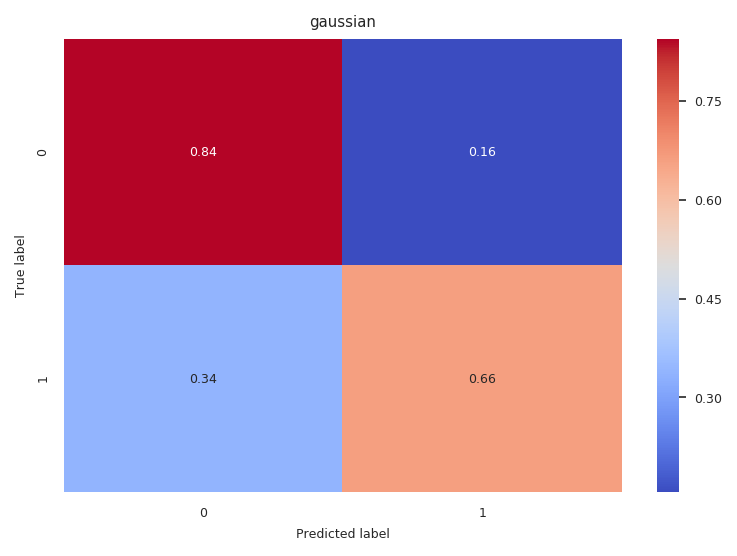

CLASSIFICATION REPORT FOR [logreg] CLASSIFIER
              precision    recall  f1-score   support

           N       0.82      0.85      0.83       105
           Y       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



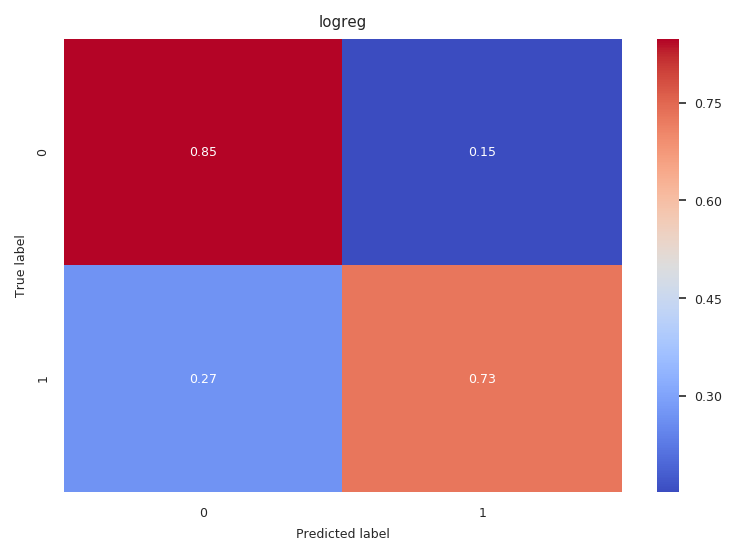

CLASSIFICATION REPORT FOR [sgd] CLASSIFIER
              precision    recall  f1-score   support

           N       0.79      0.87      0.83        99
           Y       0.81      0.71      0.76        80

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



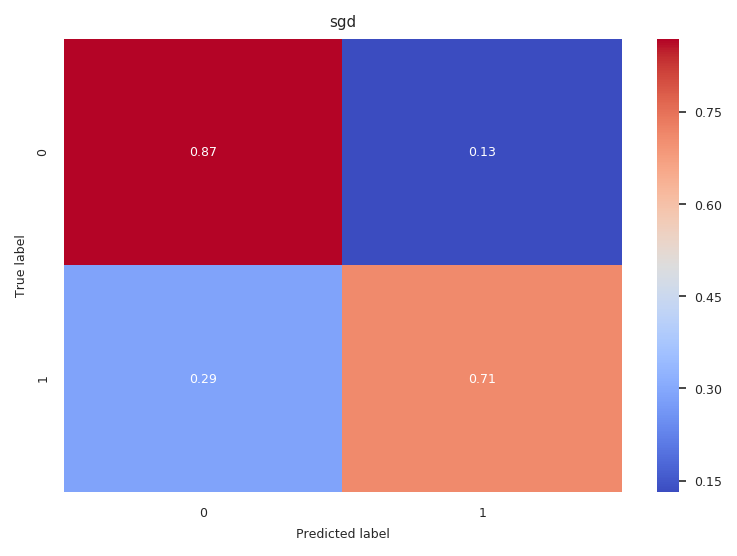

CLASSIFICATION REPORT FOR [linear_svc] CLASSIFIER
              precision    recall  f1-score   support

           N       0.85      0.84      0.85       111
           Y       0.74      0.76      0.75        68

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



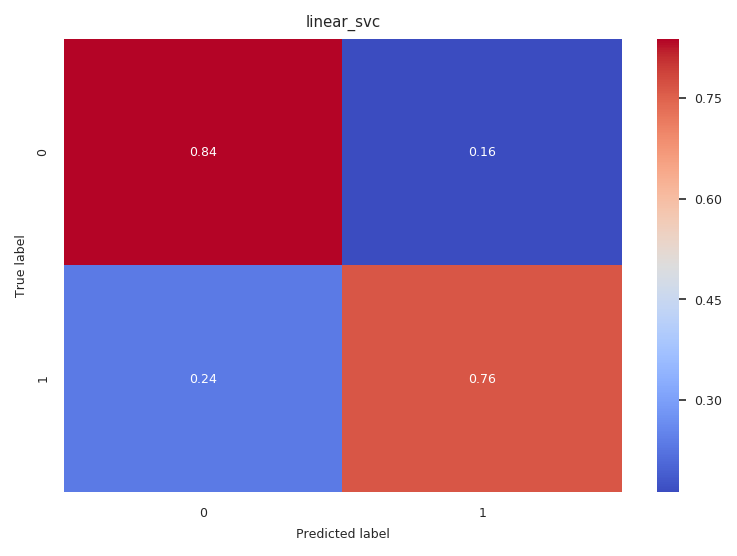

CLASSIFICATION REPORT FOR [decisiontree] CLASSIFIER
              precision    recall  f1-score   support

           N       0.83      0.87      0.85       104
           Y       0.80      0.75      0.77        75

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.81       179



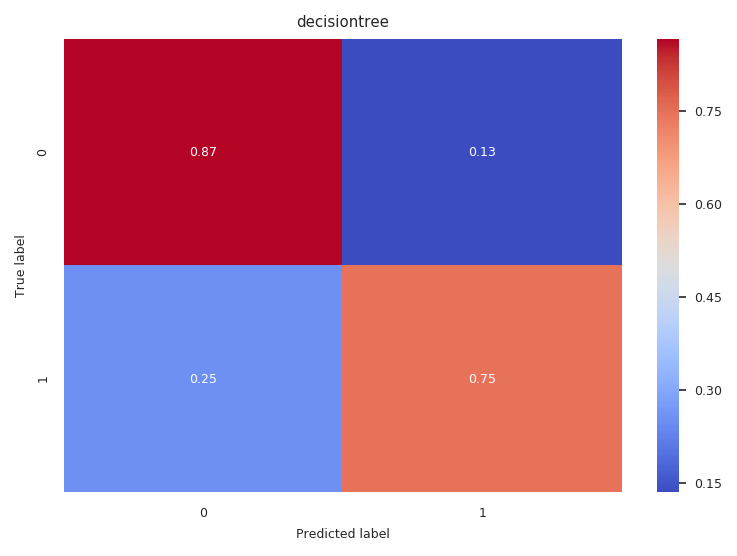

CLASSIFICATION REPORT FOR [knn] CLASSIFIER
              precision    recall  f1-score   support

           N       0.84      0.87      0.86       106
           Y       0.80      0.77      0.78        73

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



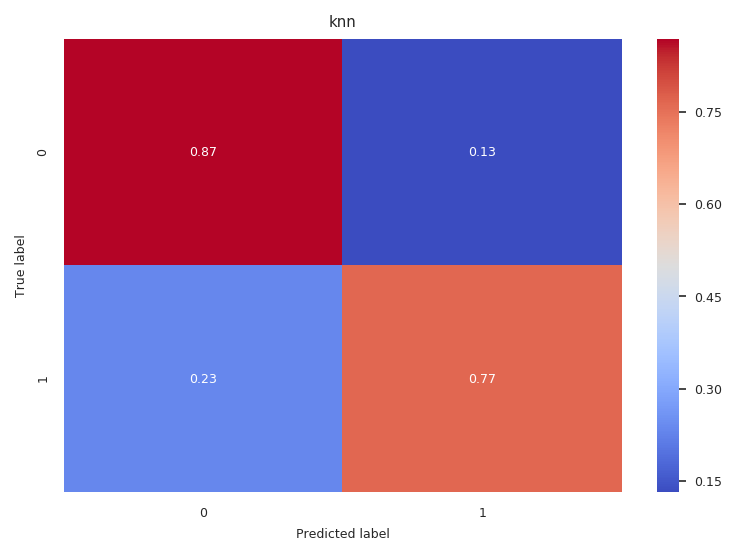

CLASSIFICATION REPORT FOR [perceptron] CLASSIFIER
              precision    recall  f1-score   support

           N       0.97      0.80      0.88       133
           Y       0.61      0.93      0.74        46

    accuracy                           0.83       179
   macro avg       0.79      0.87      0.81       179
weighted avg       0.88      0.83      0.84       179



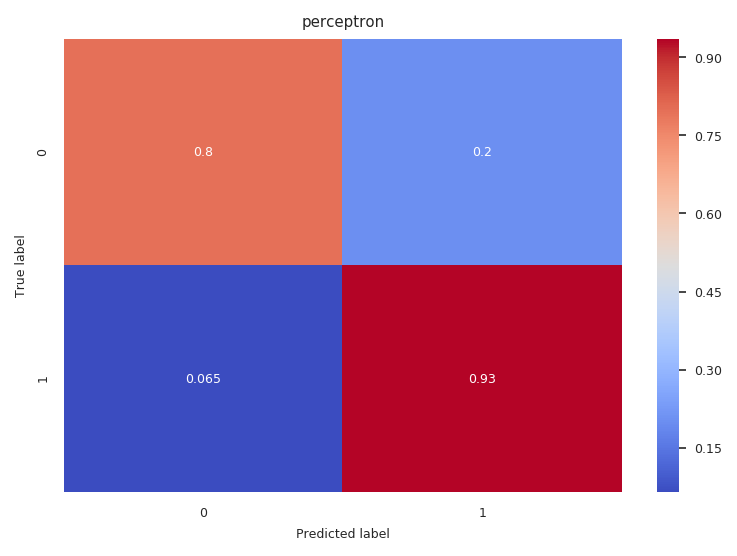

CLASSIFICATION REPORT FOR [randomforest] CLASSIFIER
              precision    recall  f1-score   support

           N       0.87      0.86      0.86       111
           Y       0.77      0.79      0.78        68

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



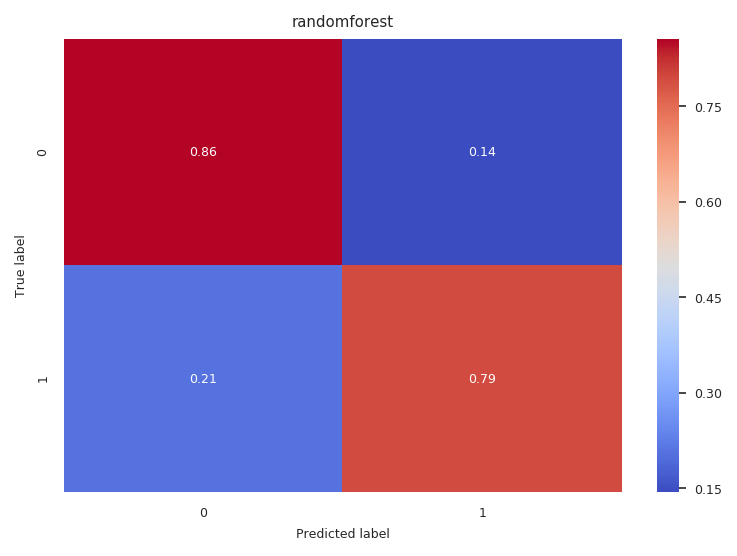

CLASSIFICATION REPORT FOR [gbk] CLASSIFIER
              precision    recall  f1-score   support

           N       0.88      0.86      0.87       112
           Y       0.77      0.81      0.79        67

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



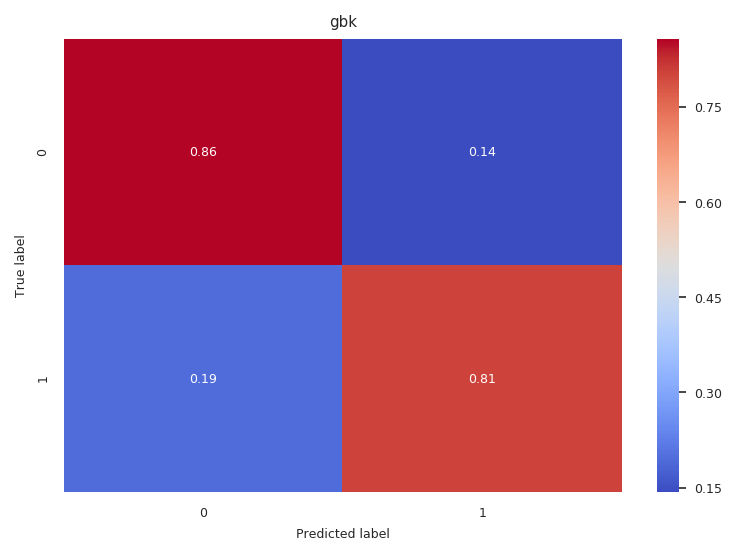

CLASSIFICATION REPORT FOR [svc] CLASSIFIER
              precision    recall  f1-score   support

           N       0.91      0.85      0.88       116
           Y       0.76      0.84      0.80        63

    accuracy                           0.85       179
   macro avg       0.83      0.85      0.84       179
weighted avg       0.86      0.85      0.85       179



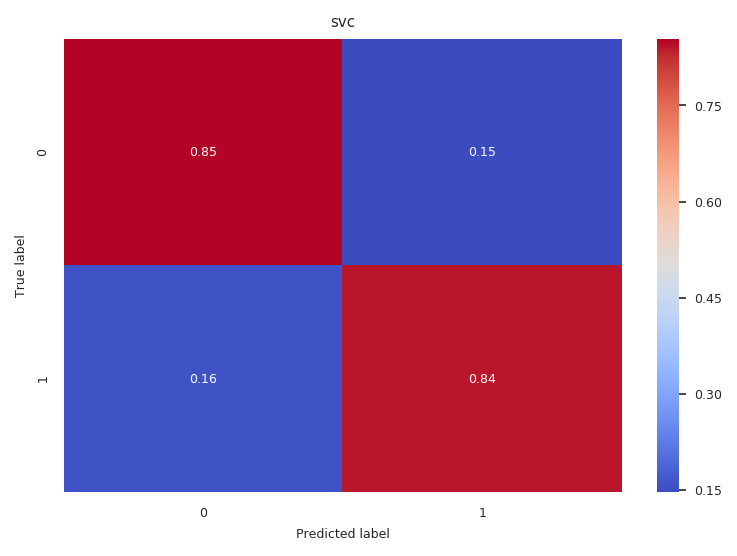

In [32]:
for model in accuracy_scores.index:
    report_string='CLASSIFICATION REPORT FOR [{}] CLASSIFIER'.format(model)
    print('='*len(report_string))
    print(report_string)
    print('='*len(report_string))
    print(classification_report(accuracy_scores.loc[model]['Y_pred'], Y_val, target_names=['N','Y']))
    cm = confusion_matrix(accuracy_scores.loc[model]['Y_pred'], Y_val)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_normalized, annot=True, cmap='coolwarm')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(model)
    plt.show()

### Stupid Baseline Comparison

We now use `scikit-learn` `DummyRegressor` to form a stupid baseline. We shall assume that everyone dies in this scenario.

In [33]:
stupid_baseline = DummyRegressor(strategy='constant', constant=0)
stupid_baseline.fit(X_train, Y_train)
Y_pred = stupid_baseline.predict(X_val)
acc_model = round(accuracy_score(Y_pred, Y_val)*100,2)
print('The accuracy for [{}] classifier is [{}]'.format('DummyRegressor',acc_model))
accuracy_scores.loc['DummyRegressor']  = [stupid_baseline,acc_model,Y_pred]
accuracy_scores = accuracy_scores.sort_values(by='accuracy')

The accuracy for [DummyRegressor] classifier is [60.89]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

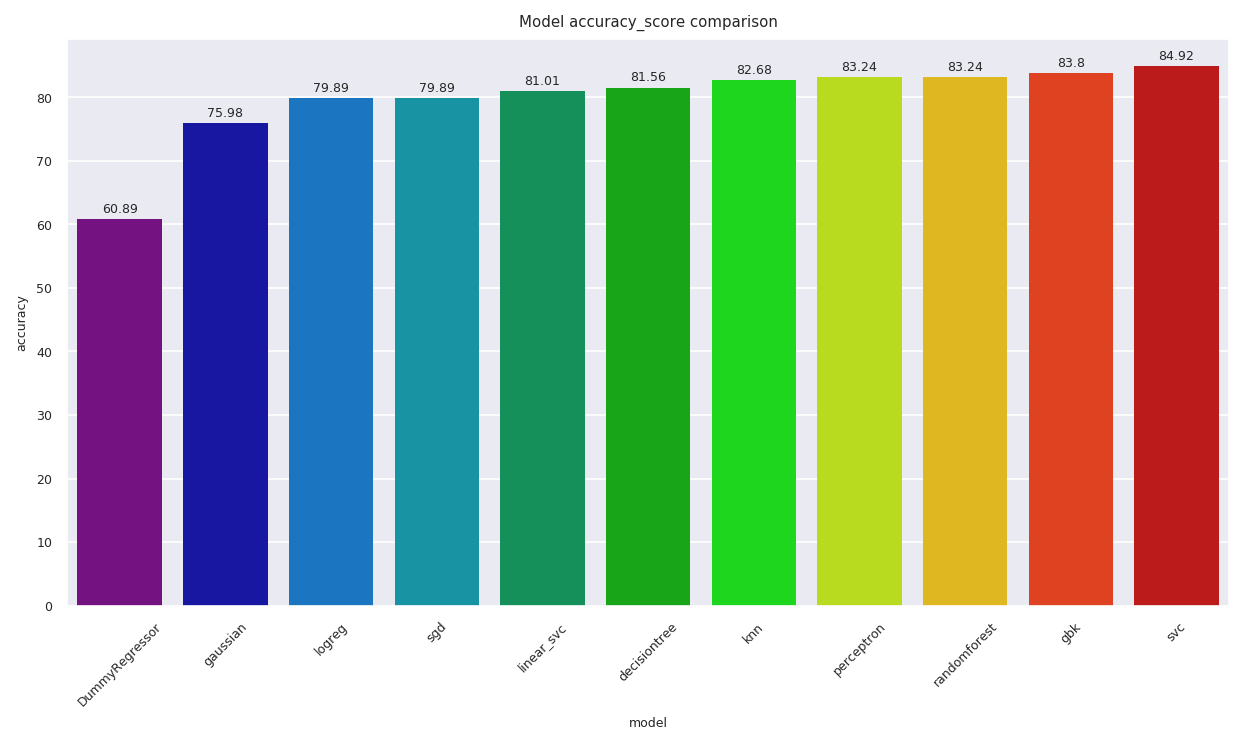

In [34]:
fig, ax = plt.subplots()
sns.barplot(x=accuracy_scores.index,
            y=accuracy_scores['accuracy'],
            palette=sns.color_palette(palette,11),
            edgecolor='None')
for i, v in enumerate(accuracy_scores['accuracy'].values):
    ax.text(x=i,
            y=v+1,
            s=str(v),
            ha='center')
plt.title('Model accuracy_score comparison')
plt.xticks(rotation=45)

The `DummyRegressor` forms the stupid baseline, assuming everyone dies in the Titanic. It has an accuracy score of 60.34, and except for the `perceptron`, the rest of the models have significantly better accuracy.

## Kaggle Submission File

Creating `.csv` file to upload for the competition

In [35]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = accuracy_scores.loc['svc']['classifier'].predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

Below is the screenshot for the Kaggle Competition

![Screenshot2](Kaggle_score3.png)